# 第一题题解
## YinMo19

In [77]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense,RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [108]:
# 数据加载
data = pd.read_csv('../../附件/附件1.csv', encoding='GB2312')
data['日期'] = pd.to_datetime(data['日期'])
data = data.sort_values('日期')
# 仅使用SC48分拣中心的数据作为示例
data_example = data[data['分拣中心'] == 'SC48'].groupby('日期')['货量'].sum().reset_index()
data_example

,日期,货量
0,2023-08-01,685
1,2023-08-02,697
2,2023-08-03,657
3,2023-08-04,673
4,2023-08-05,754
...,...,...
117,2023-11-26,583
118,2023-11-27,637
119,2023-11-28,613
120,2023-11-29,597


In [ ]:

# 数据标准化
scaler = MinMaxScaler(feature_range=(0, 1))
data_example['货量'] = scaler.fit_transform(data_example[['货量']])

In [92]:
# 将时间序列数据转换为监督学习问题
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i : (i + look_back)]
        X.append(a)
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)


look_back = 1
scaled = data_example["货量"].values
X, Y = create_dataset(scaled, look_back)

In [98]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

Epoch 1/100


/home/yinmo19/Mathor_cup_2024/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


120/120 - 1s - 9ms/step - loss: 0.0186
Epoch 2/100
120/120 - 0s - 1ms/step - loss: 0.0172
Epoch 3/100
120/120 - 0s - 959us/step - loss: 0.0172
Epoch 4/100
120/120 - 0s - 937us/step - loss: 0.0172
Epoch 5/100
120/120 - 0s - 1ms/step - loss: 0.0172
Epoch 6/100
120/120 - 0s - 1ms/step - loss: 0.0171
Epoch 7/100
120/120 - 0s - 1ms/step - loss: 0.0171
Epoch 8/100
120/120 - 0s - 1ms/step - loss: 0.0172
Epoch 9/100
120/120 - 0s - 966us/step - loss: 0.0171
Epoch 10/100
120/120 - 0s - 942us/step - loss: 0.0171
Epoch 11/100
120/120 - 0s - 1ms/step - loss: 0.0171
Epoch 12/100
120/120 - 0s - 1ms/step - loss: 0.0170
Epoch 13/100
120/120 - 0s - 1ms/step - loss: 0.0170
Epoch 14/100
120/120 - 0s - 1ms/step - loss: 0.0171
Epoch 15/100
120/120 - 0s - 1ms/step - loss: 0.0171
Epoch 16/100
120/120 - 0s - 1ms/step - loss: 0.0170
Epoch 17/100
120/120 - 0s - 929us/step - loss: 0.0170
Epoch 18/100
120/120 - 0s - 941us/step - loss: 0.0170
Epoch 19/100
120/120 - 0s - 930us/step - loss: 0.0170
Epoch 20/100
120/12

/home/yinmo19/Mathor_cup_2024/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36135 (\N{CJK UNIFIED IDEOGRAPH-8D27}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yinmo19/Mathor_cup_2024/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yinmo19/Mathor_cup_2024/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yinmo19/Mathor_cup_2024/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yinmo19/Mathor_cup_2024/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

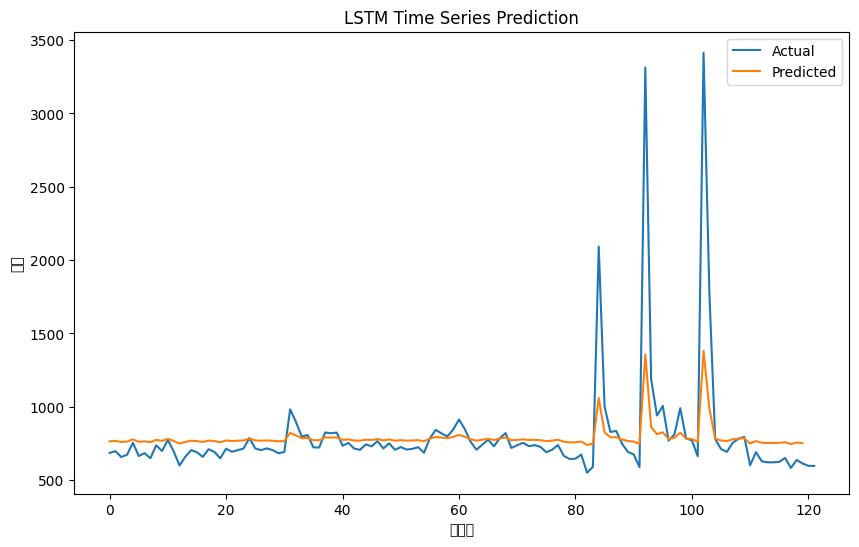

In [96]:
# 模型训练
# 构建LSTM模型
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

# 进行预测
train_predict = model.predict(X)

# 反转预测值以便可视化
train_predict = scaler.inverse_transform(train_predict)
Y_inverse = scaler.inverse_transform([Y])

# 计算性能指标
train_score = np.sqrt(mean_squared_error(Y_inverse[0], train_predict[:, 0]))
print("Train Score: %.2f RMSE" % (train_score))

# 可视化展示
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(scaled.reshape(-1, 1)))
plt.plot(train_predict)
plt.title("LSTM Time Series Prediction")
plt.legend(["Actual", "Predicted"], loc="upper right")
plt.show()

In [ ]:

# 使用最后的数据点预测未来30天
x_input = scaled[-look_back:].reshape((1, look_back, 1))
x_input = np.array([x_input]*30).reshape(1, 30, 1)  # 调整输入形状匹配模型期望的输入
predicted = model.predict(x_input, verbose=0)
predicted = predicted.flatten()

# 构建LSTM模型
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 使用最后的数据点预测未来30天
x_input = scaled[-look_back:].reshape((1, look_back, 1))
x_input = np.array([x_input]*30).reshape(1, 30, 1)  # 调整输入形状匹配模型期望的输入
predicted = model.predict(x_input, verbose=0)
predicted = predicted.flatten()


In [82]:

# 模型训练
# model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

# 进行预测
train_predict = model.predict(X)

# 反转预测值以便可视化
train_predict = scaler.inverse_transform(train_predict)
Y_inverse = scaler.inverse_transform([Y])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [83]:

# 计算性能指标
train_score = np.sqrt(mean_squared_error(Y_inverse[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (train_score))


Train Score: 464.41 RMSE


/home/yinmo19/Mathor_cup_2024/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36135 (\N{CJK UNIFIED IDEOGRAPH-8D27}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yinmo19/Mathor_cup_2024/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yinmo19/Mathor_cup_2024/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yinmo19/Mathor_cup_2024/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/yinmo19/Mathor_cup_2024/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

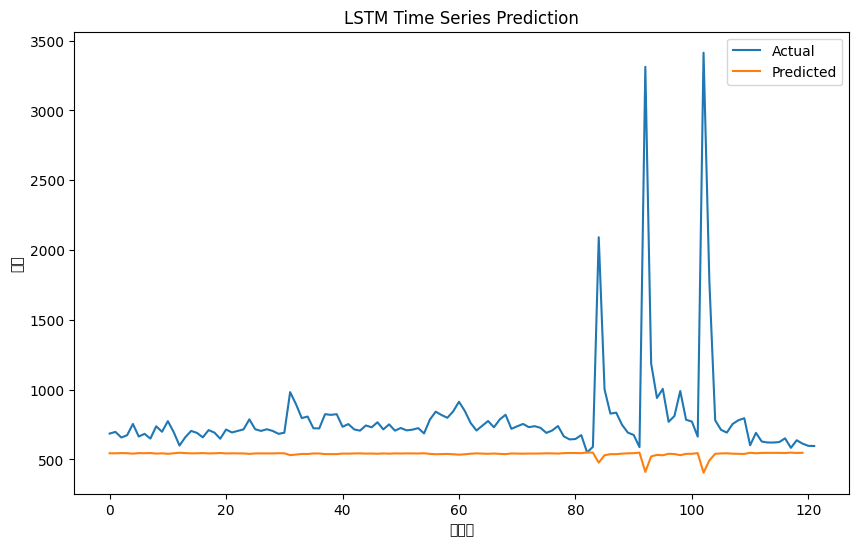

In [84]:

# 可视化展示
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(scaled.reshape(-1,1)))
plt.plot(train_predict)
plt.title('LSTM Time Series Prediction')
plt.ylabel('货量')
plt.xlabel('时间点')
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.show()

Epoch 1/100


/home/yinmo19/Mathor_cup_2024/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 - 3s - 507ms/step - loss: 0.0676
Epoch 2/100
5/5 - 0s - 15ms/step - loss: 0.0477
Epoch 3/100
5/5 - 0s - 15ms/step - loss: 0.0278
Epoch 4/100
5/5 - 0s - 15ms/step - loss: 0.0184
Epoch 5/100
5/5 - 0s - 15ms/step - loss: 0.0204
Epoch 6/100
5/5 - 0s - 14ms/step - loss: 0.0166
Epoch 7/100
5/5 - 0s - 15ms/step - loss: 0.0168
Epoch 8/100
5/5 - 0s - 14ms/step - loss: 0.0162
Epoch 9/100
5/5 - 0s - 14ms/step - loss: 0.0156
Epoch 10/100
5/5 - 0s - 14ms/step - loss: 0.0155
Epoch 11/100
5/5 - 0s - 14ms/step - loss: 0.0152
Epoch 12/100
5/5 - 0s - 14ms/step - loss: 0.0149
Epoch 13/100
5/5 - 0s - 14ms/step - loss: 0.0147
Epoch 14/100
5/5 - 0s - 14ms/step - loss: 0.0146
Epoch 15/100
5/5 - 0s - 14ms/step - loss: 0.0145
Epoch 16/100
5/5 - 0s - 14ms/step - loss: 0.0144
Epoch 17/100
5/5 - 0s - 14ms/step - loss: 0.0144
Epoch 18/100
5/5 - 0s - 14ms/step - loss: 0.0144
Epoch 19/100
5/5 - 0s - 15ms/step - loss: 0.0144
Epoch 20/100
5/5 - 0s - 13ms/step - loss: 0.0143
Epoch 21/100
5/5 - 0s - 13ms/step - loss

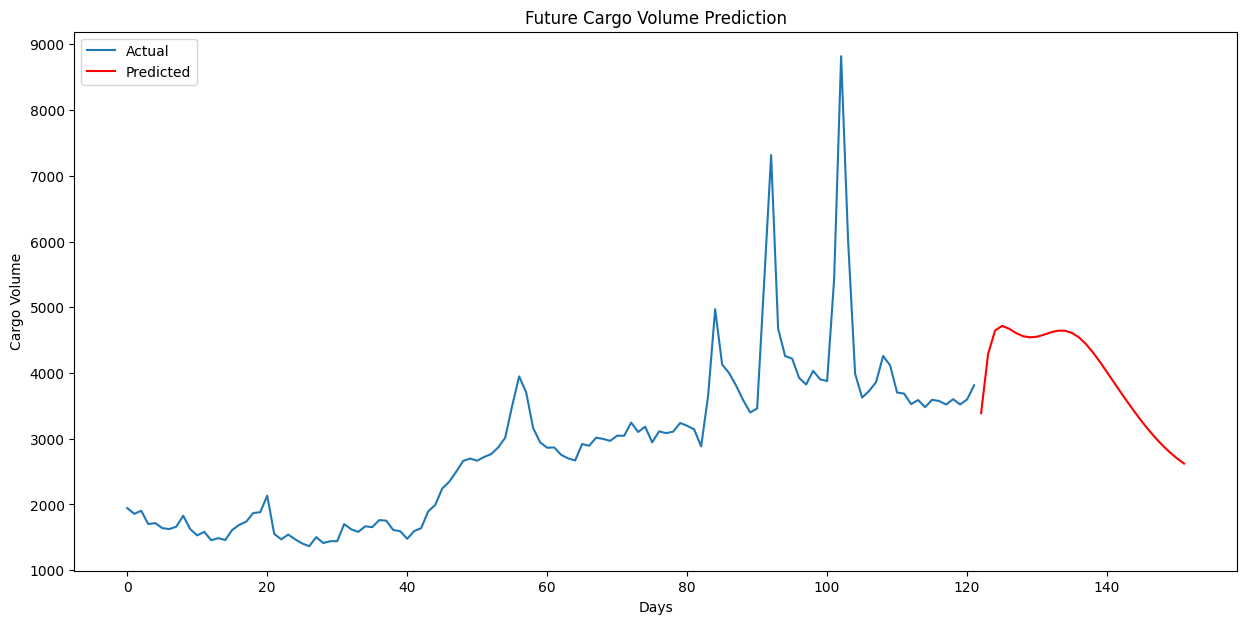

In [87]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 数据加载
data = pd.read_csv('../../附件/附件1.csv', encoding='GB2312')
data['日期'] = pd.to_datetime(data['日期'])
data = data.sort_values('日期')
data_example = data[data['分拣中心'] == 'SC23'].groupby('日期')['货量'].sum().reset_index()

# 数据标准化
scaler = MinMaxScaler(feature_range=(0, 1))
data_example['货量'] = scaler.fit_transform(data_example[['货量']])

# 准备数据
def create_dataset(dataset, look_back=1, n_future=30):
    X, Y = [], []
    for i in range(len(dataset) - look_back - n_future + 1):
        a = dataset[i:(i + look_back)]
        X.append(a)
        y = dataset[(i + look_back):(i + look_back + n_future)]
        Y.append(y)
    return np.array(X), np.array(Y)

look_back = 14  # 使用14天的数据进行预测
n_future = 30  # 预测未来30天
X, Y = create_dataset(data_example['货量'].values, look_back, n_future)
X = X.reshape((X.shape[0], X.shape[1], 1))
Y = Y.reshape((Y.shape[0], Y.shape[1], 1))

# 构建LSTM模型
model = Sequential([
    LSTM(50, activation='relu', input_shape=(look_back, 1)),
    RepeatVector(n_future),
    LSTM(50, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, Y, epochs=100, batch_size=16, verbose=2)

# 使用最后的数据点预测未来30天
x_input = data_example['货量'].values[-look_back:].reshape((1, look_back, 1))
predicted = model.predict(x_input, verbose=0)
predicted = predicted.flatten()

# 反归一化
actual = scaler.inverse_transform(data_example['货量'].values.reshape(-1,1))
predicted = scaler.inverse_transform(predicted.reshape(-1,1))

# 可视化结果
plt.figure(figsize=(15,7))
plt.plot(actual)
plt.plot(np.arange(len(actual), len(actual) + n_future), predicted, color='red')
plt.title('Future Cargo Volume Prediction')
plt.ylabel('Cargo Volume')
plt.xlabel('Days')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()